# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [1]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = web.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [2]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


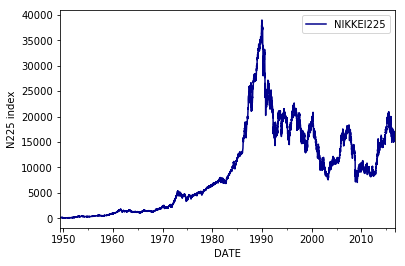

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

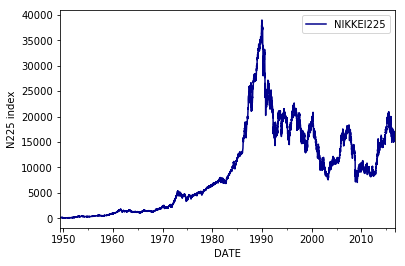

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')
plt.show()

plt.show()を追加することにより出力の仕方が変わりました。

In [6]:
price = web.DataReader("aapl", 'yahoo',"1990/1/4",end)#yahooのサービスの停止により変更
price.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-03,1.357143,1.357143,1.339286,1.339286,1.121635,51998800


In [7]:
print(price.tail(1))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-09-30  112.459999  113.370003  111.800003  113.050003  110.692505   

              Volume  
Date                  
2016-09-30  36379100  


## 4.2 データベースの加工

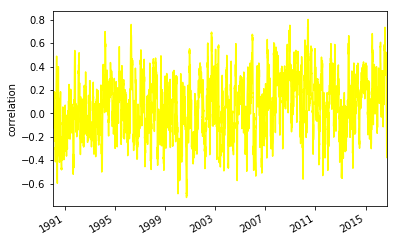

In [8]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02  111.389999  111.440002  107.349998  109.330002  103.494423   
2015-01-05  108.290001  108.650002  105.410004  106.250000  100.578819   

              Volume  
Date                  
2015-01-02  53204600  
2015-01-05  64285500  


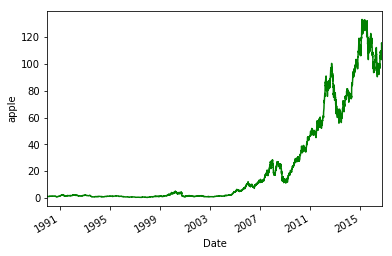

In [9]:
price = web.DataReader("aapl", 'yahoo','1990/1/1',end)#yahooのサービスの停止により変更
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('apple')

In [10]:
print(price.resample('M').first().tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-05-31   93.970001   94.080002   92.400002   93.639999   90.641396   
2016-06-30   99.019997   99.540001   98.330002   98.459999   95.887321   
2016-07-31   95.489998   96.470001   95.330002   95.889999   93.384460   
2016-08-31  104.410004  106.150002  104.410004  106.050003  103.278984   
2016-09-30  106.139999  106.800003  105.620003  106.730003  104.504303   

              Volume  
Date                  
2016-05-31  48160100  
2016-06-30  29173300  
2016-07-31  26026500  
2016-08-31  38167900  
2016-09-30  26701500  


In [11]:
print(price.resample('M').last().tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-05-31   99.599998  100.400002   98.820000   99.860001   97.250732   
2016-06-30   94.440002   95.769997   94.300003   95.599998   93.102036   
2016-07-31  104.190002  104.550003  103.680000  104.209999  101.487068   
2016-08-31  105.660004  106.570000  105.639999  106.099998  103.887428   
2016-09-30  112.459999  113.370003  111.800003  113.050003  110.692505   

              Volume  
Date                  
2016-05-31  42307200  
2016-06-30  35836400  
2016-07-31  27733700  
2016-08-31  29662400  
2016-09-30  36379100  


In [12]:
print(price.resample('M',loffset='1d').last().tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-06-01   99.599998  100.400002   98.820000   99.860001   97.250732   
2016-07-01   94.440002   95.769997   94.300003   95.599998   93.102036   
2016-08-01  104.190002  104.550003  103.680000  104.209999  101.487068   
2016-09-01  105.660004  106.570000  105.639999  106.099998  103.887428   
2016-10-01  112.459999  113.370003  111.800003  113.050003  110.692505   

              Volume  
Date                  
2016-06-01  42307200  
2016-07-01  35836400  
2016-08-01  27733700  
2016-09-01  29662400  
2016-10-01  36379100  


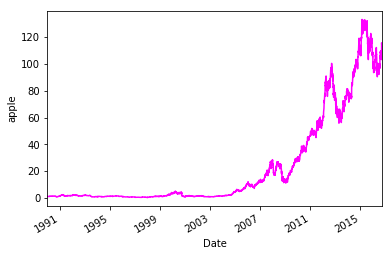

In [13]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [14]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

0.465538895627 6742


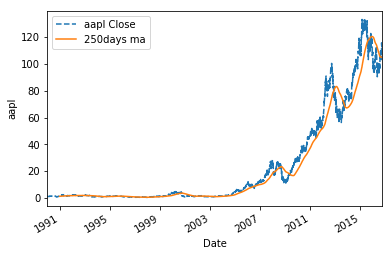

In [15]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

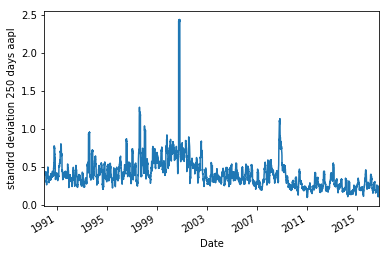

In [16]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days aapl')